In [1]:
"""
Authors: Abdul Samad            samad19472002@gmail.com
         Janzaib Masood         janzaibaloch786@gmail.com
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import roc_curve, auc
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


def reSampler(X, y, samp):
    if(samp == 'None'):
        return splitter(X, y, 0.1)
    
    if(samp == 'SMOTE'):
        sm = SMOTE(ratio = 'auto', kind = 'regular')
        X_resampled , y_resampled = sm.fit_sample(X, Y)
        return splitter(X_resampled , y_resampled, 0.1)
    
    if(samp == 'SMOTEENN'):
        sm = SMOTEENN()
        X_resampled , y_resampled = sm.fit_sample(X, Y)
        return splitter(X_resampled , y_resampled, 0.1)
    
    if(samp == 'SMOTETomek'):
        sm = SMOTEENN()
        X_resampled , y_resampled = sm.fit_sample(X, Y)
        return splitter(X_resampled , y_resampled, 0.1)

def splitter(X, y, test_Size):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = test_Size, random_state=12)
    return xtrain, xtest, ytrain, ytest

def rocPlotter(actu, pred, clf, samp):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(actu, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    Title = str('ROC: ' + str(clf) + ' using ' + str(samp))
    plt.title(Title)
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc

def applyModel(clfr, X_, y_, xt, yt):
    a = globals()[clfr]()
    a.fit(X_, y_)
    scor = a.score(xt, yt)*100
    pred = a.predict(xt)
    actu = yt
    return pred, actu, scor
    
    
def tryAll(clfList, sampList, Inputs, Outputs):
    rep = np.zeros( (len(clfList), len(sampList)), dtype=float)
    
    for clf, clfIndex in zip(clfList, range(len(clfList))):
        for samp, sampIndex in zip(sampList, range(len(sampList))):
            X_train, X_test, Y_train, Y_test = reSampler(Inputs, Outputs, samp)
            prediction , actual, score =applyModel(clf, X_train, Y_train, X_test, Y_test)
            currentAUC = rocPlotter(prediction, actual, clf, samp)
            print(clf, ' with ', samp, ' scored =  ', score, ' on test set with AUC = ', currentAUC)
            rep[clfIndex, sampIndex] = currentAUC
    return rep
            
    

# Here you begin working on the data
df = pd.read_excel('Data.xlsx')

# Deleting the two mentioned columns from the dataframe
df.drop('VchMotherTounge', axis=1, inplace =True)
df.drop('MotherTongueBin', axis=1, inplace =True)
df.head()

,GenderCode,IntBrothers,IntSisters,IntSchoolBrothers,IntSchoolSisters,ClassSchoolStatus,Disability01,Lang1,Lang2,Lang3,Lang4,Religion,RESULT
0,0,3,3,3,2,1,0,1,0,0,0,1,FAIL
1,0,4,5,1,1,1,0,1,0,0,0,1,PASS
2,0,5,3,0,0,1,0,1,0,0,0,1,PASS
3,0,2,4,1,4,1,0,1,0,0,0,1,PASS
4,0,2,1,0,0,1,0,1,0,0,0,1,FAIL


In [2]:
# Slicing from main dataframe to Input Data(X) and output Data(y)
y = df.iloc[:, 12]
X = df.iloc[:,:12]
# Replacng PASS and FAIL with integers 1 and 0 respectively
y[y == 'PASS'] = 1
y[y == 'FAIL'] = 0
display(X.head())
display(y.head())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,GenderCode,IntBrothers,IntSisters,IntSchoolBrothers,IntSchoolSisters,ClassSchoolStatus,Disability01,Lang1,Lang2,Lang3,Lang4,Religion
0,0,3,3,3,2,1,0,1,0,0,0,1
1,0,4,5,1,1,1,0,1,0,0,0,1
2,0,5,3,0,0,1,0,1,0,0,0,1
3,0,2,4,1,4,1,0,1,0,0,0,1
4,0,2,1,0,0,1,0,1,0,0,0,1


0    0
1    1
2    1
3    1
4    0
Name: RESULT, dtype: object

In [3]:
# It's funny that I didn't have internet so I improvised an inefficient method
# to put values from Data frames in lists X and Y
a = y.values
b = X.values
del(y)
del(X)
X = []
Y = []
length = len(a)
for i in range(length):
    X.append(b[i,:])
    Y.append(a[i])
    
# How the the distribution of real Data set looks like?
Pass = np.count_nonzero(a)
print("Pass instances: ", Pass)
print("Fail instances: ", len(a) - Pass)

Pass instances:  4562
Fail instances:  1047


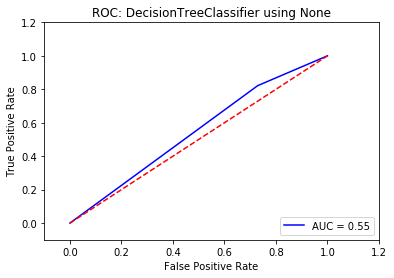

DecisionTreeClassifier  with  None  scored =   71.6577540107  on test set with AUC =  0.546306970233


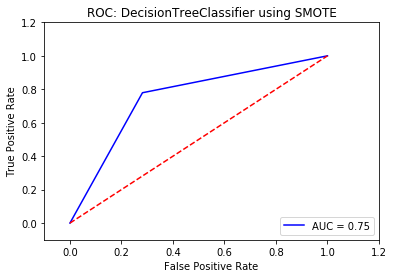

DecisionTreeClassifier  with  SMOTE  scored =   74.9178532311  on test set with AUC =  0.748812163446


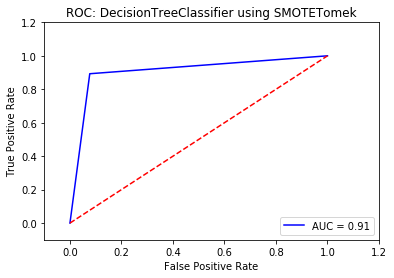

DecisionTreeClassifier  with  SMOTETomek  scored =   90.7407407407  on test set with AUC =  0.907967032967


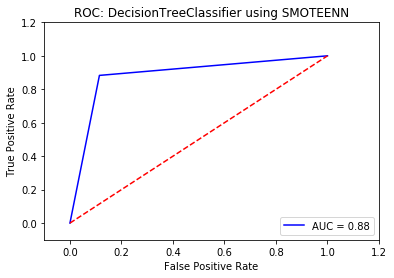

DecisionTreeClassifier  with  SMOTEENN  scored =   88.4160756501  on test set with AUC =  0.884227511093


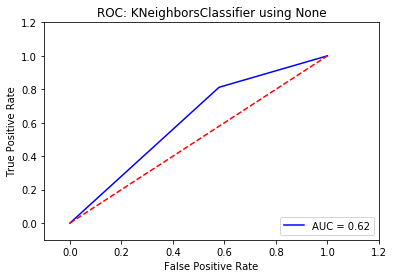

KNeighborsClassifier  with  None  scored =   79.8573975045  on test set with AUC =  0.61643037483


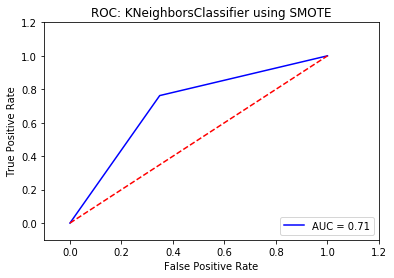

KNeighborsClassifier  with  SMOTE  scored =   70.0985761227  on test set with AUC =  0.706870025238


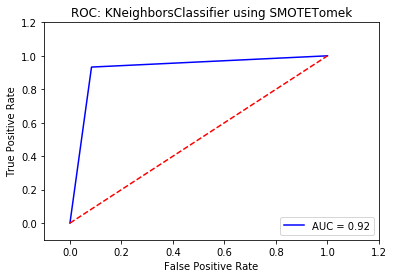

KNeighborsClassifier  with  SMOTETomek  scored =   92.4137931034  on test set with AUC =  0.924495933582


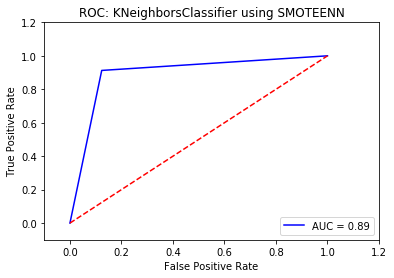

KNeighborsClassifier  with  SMOTEENN  scored =   89.376443418  on test set with AUC =  0.894636670801


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:563: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


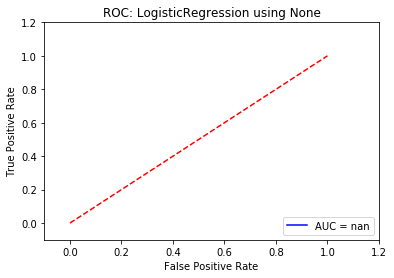

LogisticRegression  with  None  scored =   80.3921568627  on test set with AUC =  nan


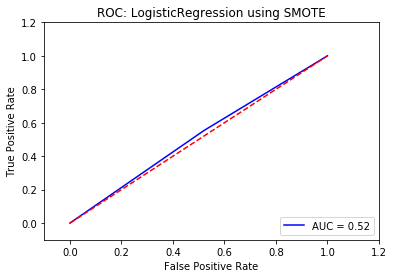

LogisticRegression  with  SMOTE  scored =   50.9309967141  on test set with AUC =  0.51649349742


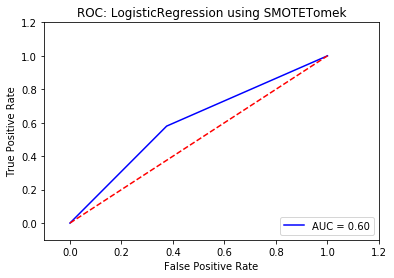

LogisticRegression  with  SMOTETomek  scored =   60.5442176871  on test set with AUC =  0.602146581448


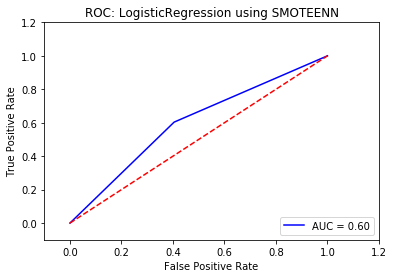

LogisticRegression  with  SMOTEENN  scored =   59.9547511312  on test set with AUC =  0.599529074529


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:563: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


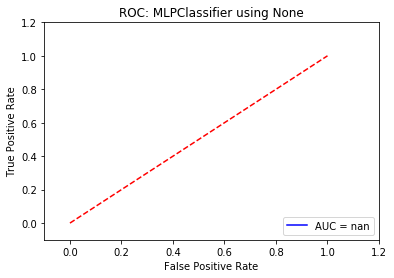

MLPClassifier  with  None  scored =   80.3921568627  on test set with AUC =  nan


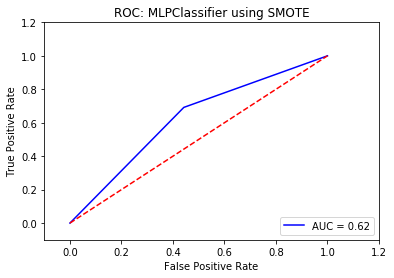

MLPClassifier  with  SMOTE  scored =   60.6790799562  on test set with AUC =  0.624737571489


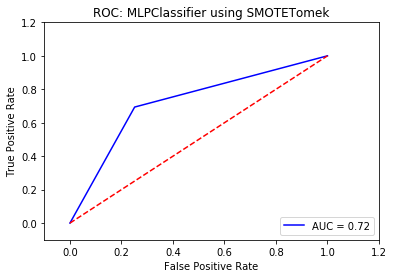

MLPClassifier  with  SMOTETomek  scored =   71.9457013575  on test set with AUC =  0.721204645904


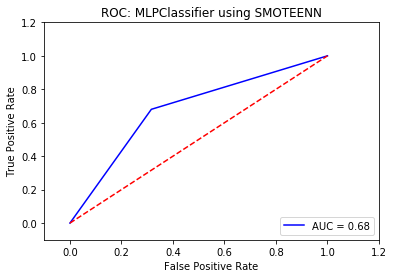

MLPClassifier  with  SMOTEENN  scored =   68.1818181818  on test set with AUC =  0.682049883577


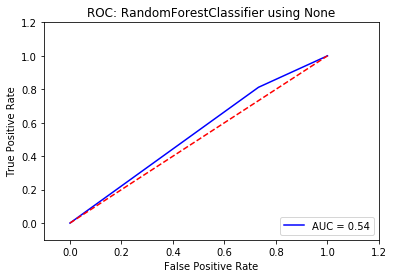

RandomForestClassifier  with  None  scored =   75.7575757576  on test set with AUC =  0.539869165488


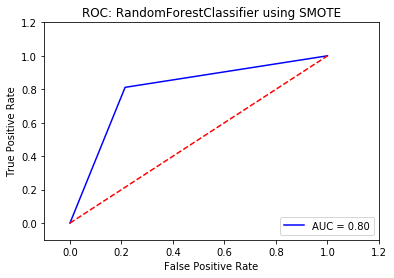

RandomForestClassifier  with  SMOTE  scored =   79.9561883899  on test set with AUC =  0.798678881389


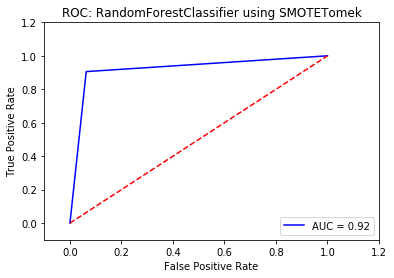

RandomForestClassifier  with  SMOTETomek  scored =   91.9621749409  on test set with AUC =  0.921210752202


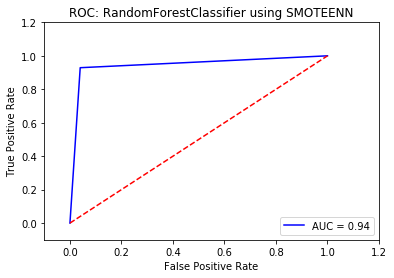

RandomForestClassifier  with  SMOTEENN  scored =   94.3661971831  on test set with AUC =  0.944543946932


In [4]:
Classifiers = ['DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'MLPClassifier', 'RandomForestClassifier']
Samplers = ['None', 'SMOTE', 'SMOTETomek', 'SMOTEENN']

report = tryAll(Classifiers, Samplers, X, Y)

In [5]:
del(df)
df = pd.DataFrame(report, columns = Samplers, index = Classifiers)
df

[[ 0.54630697  0.74881216  0.90796703  0.88422751]
 [ 0.61643037  0.70687003  0.92449593  0.89463667]
 [        nan  0.5164935   0.60214658  0.59952907]
 [        nan  0.62473757  0.72120465  0.68204988]
 [ 0.53986917  0.79867888  0.92121075  0.94454395]]


,None,SMOTE,SMOTETomek,SMOTEENN
DecisionTreeClassifier,0.546307,0.748812,0.907967,0.884228
KNeighborsClassifier,0.616430,0.706870,0.924496,0.894637
LogisticRegression,NaN,0.516493,0.602147,0.599529
MLPClassifier,NaN,0.624738,0.721205,0.682050
RandomForestClassifier,0.539869,0.798679,0.921211,0.944544
